自定义层次(子类，lambda方法)

In [1]:
# 使用tf.keras搭建回归模型，数据集使用加利福尼亚的房价预测
#导入必要的库即版本

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.16.4
pandas 0.23.4
sklearn 0.19.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [6]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))
layer(tf.zeros([10, 5]))
# 输入10✖5的矩阵，输出10✖100的矩阵
# 像调用函数一样使用layer


<tf.Tensor: id=29, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 

In [8]:
layer.variables
# 打印出layer中的所有参数
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.06181267,  0.09704147, -0.13761345, -0.03465421,  0.18842317,
         -0.1696481 ,  0.15502922, -0.18862008,  0.16987978, -0.13756454,
         -0.11463474, -0.12883791, -0.08111526, -0.06541719, -0.11032693,
         -0.06535597, -0.12027916,  0.16505401, -0.14103115, -0.00326119,
          0.09702046,  0.08360003,  0.1184449 ,  0.10699759,  0.11155771,
         -0.16076797, -0.1686013 , -0.19924384,  0.03357227,  0.12216164,
          0.08843572, -0.02543771,  0.13377424,  0.08231364,  0.14927422,
         -0.1790871 ,  0.10663743, -0.14404391, -0.02296604,  0.18471698,
          0.04134409, -0.13006394,  0.13123281,  0.09964208,  0.0309108 ,
         -0.14461914, -0.22873336, -0.21702656, -0.159038  , -0.0040689 ,
         -0.21303289,  0.09505968,  0.07770212,  0.09156977, -0.15198764,
          0.16175   , -0.05638061, -0.02552576,  0.2186781 , -0.18961386,
         -0.09835187,  0.0450062 , -0.0532

In [9]:
#layer中的其他方法，使用help查看
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:

In [2]:
# 导入数据
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


(20640, 8)
(20640,)


In [3]:
# 打印数据
import pprint

pprint.pprint(housing.data[:5])
pprint.pprint(housing.target[:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
# 拆分训练集、测试集、验证集
from sklearn.model_selection import train_test_split

# 默认按3：1的比例拆分
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


### 数据归一化

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 训练机上获得均值和方差，测试集和验证集上用相同的均值和方差
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### 构建模型

In [14]:
# tf.nn.softplus:log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x:tf.nn.softplus(x))
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [15]:
# 自定义全连接层/customized dense layer
# 继承keras.layers.Layer
# 定义一个子类，子类中定义三种方法，三种方法实现不同的功能
class CustomizedDenseLayer(keras.layers.Layer):
    # 重载方法
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数"""
        self.kernel = self.add_weight(name='kernel',
                                     shape=(input_shape[1], self.units),
                                     initializer='uniform',
                                     trainable=True)
        self.bias = self.add_weight(name='bias',
                                   shape=(self.units,),
                                   initializer='zeros',
                                   trainable=True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self,x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu', input_shape=x_train.shape[1:]),
    #最后一层一个神经元
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation="softplus"),
    # keras.layers.Dense(1), keras.layers.Activation('softplus')
])
model.summary()
# 编译，目标函数使用均方差，优化方法使用随机梯度下降，也可以自己定义
model.compile(loss='mean_squared_error', optimizer='sgd')
# 使用earlystopping
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

W0814 12:21:44.813749 18356 ag_logging.py:145] Entity <bound method CustomizedDenseLayer.call of <__main__.CustomizedDenseLayer object at 0x00000273ADEC1588>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: (unicode error) 'utf-8' codec can't decode byte 0xcd in position 0: invalid continuation byte (tmp2bmicr5t.py, line 6)
W0814 12:21:44.867605 18356 ag_logging.py:145] Entity <bound method CustomizedDenseLayer.call of <__main__.CustomizedDenseLayer object at 0x00000273ADEC17F0>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: (unicode error) 'utf-8' codec can't decode byte 0xcd in position 0: invalid continuation byte (tmpe1_gves_.py, line 6)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_6 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_7 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs=100, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 34us/sample - loss: 1.0509 - val_loss: 0.6277
Epoch 2/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5425 - val_loss: 0.5354
Epoch 3/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4828 - val_loss: 0.4929
Epoch 4/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4616 - val_loss: 0.4731
Epoch 5/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4458 - val_loss: 0.4616
Epoch 6/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4375 - val_loss: 0.4442
Epoch 7/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4328 - val_loss: 0.4403
Epoch 8/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4213 - val_loss: 0.4281
Epoch 9/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.421

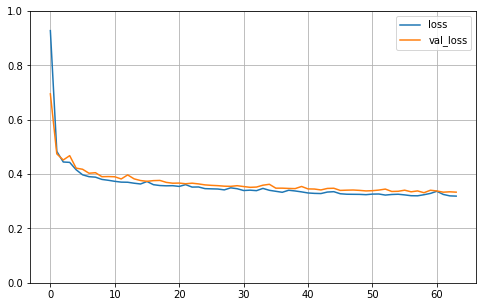

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)